In [12]:
import os


if 'original_dir' not in globals():
    original_dir = os.getcwd()
os.chdir(os.path.join(original_dir, os.pardir))



In [88]:
study_programs = pd.read_csv("data/csv/HS24/VVZ_HS24_study_programs.csv", encoding="utf-16")
study_programs

,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
0,Doctoral Program Drug Discovery,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Michael Arand,Olga von Niederhäusern,Joint Doctorate at the Faculty of Science of t...
1,Doctoral Program Evolutionary Biology,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Kentaro Shimizu,Anton Weingrill,Joint Doctorate at the Faculty of Science of t...
2,Doctoral Program Mathematics,English,NaN,Faculty of Science,Benjamin Schlein,Jessica Bolsinger,Doctorate Faculty of Science
3,Major 90 Artificial Intelligence (Fast Track),English,https://www.oec.uzh.ch/en/studies/general/regu...,NaN,NaN,NaN,Master of Science UZH in Informatics (PVO08)
4,Concentration General Geography,English,NaN,Faculty of Science,NaN,NaN,Master of Science Faculty of Science (120) (2021)
...,...,...,...,...,...,...,...
688,Major Economics (Fast Track),NaN,NaN,"Faculty of Business, Economics and Informatics",NaN,NaN,Master of Science UZH in Business and Economic...
689,Major Management and Economics (Fast Track),NaN,NaN,NaN,NaN,NaN,Master of Science UZH in Business and Economic...
690,Major Betriebswirtschaftslehre (Fast Track),NaN,NaN,NaN,NaN,NaN,Master of Science UZH in Business and Economic...
691,Major Banking and Finance (Fast Track),NaN,NaN,NaN,NaN,NaN,Master of Science UZH in Business and Economic...


In [13]:
import pandas as pd
import os

modules = pd.read_csv("data/csv/HS24/VVZ_HS24_modules.csv", encoding="utf-16")
modulesHS24 = pd.read_csv("data/csv/HS24/VVZ_HS24_modules.csv", encoding="utf-16")
modulesHS24 = pd.read_csv("data/csv/HS24/VVZ_HS24_modules.csv", encoding="utf-16")
modulesFS23 = pd.read_csv("data/csv/FS23/VVZ_FS23_modules.csv", encoding="utf-16")
modulesHS23 = pd.read_csv("data/csv/HS23/VVZ_HS23_modules.csv", encoding="utf-16")

time_schedule = pd.read_csv("data/csv/HS24/VVZ_HS24_time_schedule.csv")
time_schedule23 = pd.read_csv("data/csv/HS23/VVZ_HS23_time_schedule.csv")
df = pd.read_csv("data/csv/HS24/VVZ_HS24_study_programs.csv", encoding="utf-16")

study_programs = pd.read_csv("data/csv/HS24/VVZ_HS24_study_programs.csv", encoding="utf-16")
study_programsFS24 = pd.read_csv("data/csv/FS24/VVZ_FS24_study_programs.csv", encoding="utf-16")
study_programsHS24 = pd.read_csv("data/csv/HS24/VVZ_HS24_study_programs.csv", encoding="utf-16")
study_programsFS23 = pd.read_csv("data/csv/FS23/VVZ_FS23_study_programs.csv", encoding="utf-16")
study_programsHS23 = pd.read_csv("data/csv/HS23/VVZ_HS23_study_programs.csv", encoding="utf-16")



module_componentsFS24 = pd.read_csv("data/csv/FS24/VVZ_FS24_module_components.csv", encoding="utf-16")
module_componentsHS24 = pd.read_csv("data/csv/HS24/VVZ_HS24_module_components.csv", encoding="utf-16")
module_componentsHS23 = pd.read_csv("data/csv/HS23/VVZ_HS23_module_components.csv", encoding="utf-16")
module_componentsFS23 = pd.read_csv("data/csv/FS23/VVZ_FS23_module_components.csv", encoding="utf-16")
module_components = pd.read_csv("data/csv/HS24/VVZ_HS24_module_components.csv", encoding="utf-16")

df.head()

,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
0,Doctoral Program Drug Discovery,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Michael Arand,Olga von Niederhäusern,Joint Doctorate at the Faculty of Science of t...
1,Doctoral Program Evolutionary Biology,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Kentaro Shimizu,Anton Weingrill,Joint Doctorate at the Faculty of Science of t...
2,Doctoral Program Mathematics,English,NaN,Faculty of Science,Benjamin Schlein,Jessica Bolsinger,Doctorate Faculty of Science
3,Major 90 Artificial Intelligence (Fast Track),English,https://www.oec.uzh.ch/en/studies/general/regu...,NaN,NaN,NaN,Master of Science UZH in Informatics (PVO08)
4,Concentration General Geography,English,NaN,Faculty of Science,NaN,NaN,Master of Science Faculty of Science (120) (2021)


In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities, label_propagation_communities, louvain_communities, modularity, partition_quality, louvain_partitions
from adjustText import adjust_text


def plot_graph(G, communities, title, algorithm_name = "Louvain", filename = None):
    color_map = []
    for node in G.nodes():
        for i, community in enumerate(communities):
            if node in community:
                color_map.append(i)  

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    min_weight = min(edge_weights)
    max_weight = max(edge_weights)
    
    # edge weights
    edge_widths = [0.1 + (weight - min_weight) / (max_weight - min_weight) * 20 for weight in edge_weights]
    nx.draw(
        G, pos, with_labels=False, node_color=color_map, cmap=plt.cm.rainbow,
        edge_color="gray", node_size=200, font_size=8, width=edge_widths
    )
    texts = []
    for node, (x, y) in pos.items():
        texts.append(plt.text(x, y, s=node, fontsize=8, ha='center', va='center'))
    adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))
    plt.title(title, fontsize=16)
    
   
    
    # Save the plot to a file
    if filename:
        plt.title(f"{algorithm_name} - {filename}")
        print(f"{algorithm_name} - {filename}")
        # plt.savefig(f"{filename}.png", facecolor='white')
        
    plt.show()
    plt.close()
    
def analyze_graph(G, top_n=5):

    degrees = dict(G.degree())
    sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    highest_degree_nodes = sorted_degrees[:top_n]
    lowest_degree_nodes = sorted_degrees[-top_n:]


    edge_weights = nx.get_edge_attributes(G, 'weight')
    sorted_edge_weights = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)
    highest_weight_edges = sorted_edge_weights[:top_n]
    lowest_weight_edges = sorted_edge_weights[-top_n:]


    analysis = {
        "Top Highest Degree Nodes": highest_degree_nodes,
        "Top Lowest Degree Nodes": lowest_degree_nodes,
        "Top Highest Weight Edges": highest_weight_edges,
        "Top Lowest Weight Edges": lowest_weight_edges,
    }


    print("Graph Analysis:")
    for key, value in analysis.items():
        print(f"\n{key}:")
        for item in value:
            print(f"  {item}")

    return analysis


## Faculties:




In [104]:

organization_counts = study_programsHS23["Organization"].value_counts()
organization_counts.head(10)

Organization
Faculty of Science                                535
Faculty of Arts and Social Sciences               241
Faculty of Business, Economics and Informatics    217
Faculty of Theology                               159
Department of Romance Studies                     119
Institute of Education                            113
Humanmedizin                                      101
Faculty of Law                                     96
Institute of Asian and Oriental Studies            96
Department of History                              55
Name: count, dtype: int64

In [16]:
study_programs = study_programsHS23
test= study_programs[study_programs["Organization"] == "Department of History"]
test = study_programs[study_programs["Part Of"].str.contains(r"\(RVO ?19\)", case=False, na=False) & study_programs["Program"].str.contains("Major", case=False, na=False)]
# test = study_programs[study_programs["Program"].str.contains("Psychology", case=False, na=False)]

test = study_programs[
    study_programs["Part Of"].str.contains(r"\(RVO ?19\)", case=False, na=False) & 
    study_programs["Program"].str.contains("Major", case=False, na=False)
]


study_programs.loc[test.index, "Organization"] = "Faculty of Arts and Social Sciences"



## Create graph based on semester and filter

In [96]:
module_components = module_componentsHS24
study_programs = study_programsHS24

test = study_programs[
    study_programs["Part Of"].str.contains(r"\(RVO ?19\)", case=False, na=False) & 
    study_programs["Program"].str.contains("Major", case=False, na=False)
]

study_programs.loc[test.index, "Organization"] = "Faculty of Arts and Social Sciences"

## choose only the good faculties
combined_df = pd.concat([
    study_programs[study_programs["Organization"] == "Faculty of Science"],
    study_programs[study_programs["Organization"] == "Faculty of Business, Economics and Informatics"],
    study_programs[study_programs["Organization"] == "Faculty of Theology and the Study of Religion"],
    study_programs[study_programs["Organization"] == "Faculty of Theology"],
    # study_programs[study_programs["Organization"] == "Faculty of Arts and Social Sciences"],
], axis=0, ignore_index=True) 


df = combined_df

## different filters
bachelors = df[df["Part Of"].str.contains("Bachelor", case=False, na=False)]
masters = df[df["Part Of"].str.contains("Master", case=False, na=False)]
majors = df[df["Program"].str.contains("Major", case=False, na=False)]
minors = df[df["Program"].str.contains("Minor", case=False, na=False)]
bsc_majors = df[df["Part Of"].str.contains("Bachelor", case=False, na=False) & df["Program"].str.contains("Major", case=False, na=False)]
msc_majors= df[df["Part Of"].str.contains("Master", case=False, na=False) & df["Program"].str.contains("Major", case=False, na=False)]
msc_minors = df[df["Part Of"].str.contains("Master", case=False, na=False) & df["Program"].str.contains("Minor", case=False, na=False)]
bsc_minors = df[df["Part Of"].str.contains("Bachelor", case=False, na=False) & df["Program"].str.contains("Minor", case=False, na=False)]


filtered_df = msc_majors
edges = {}

for _, row in module_components.iterrows():
    components = row['Components']
    if pd.isna(components):
        continue
    for major in filtered_df['Program']:
        if major in components:
            for other_major in filtered_df['Program']:
                if other_major in components and major != other_major:
                    edge_pair = tuple(sorted([major, other_major]))  
                    if edge_pair in edges:
                        edges[edge_pair] += 1  
                    else:
                        edges[edge_pair] = 1  
                        



G = nx.Graph()
for edge, weight in edges.items():
    G.add_edge(edge[0], edge[1], weight=weight)




## Check graph
I used best_n and cutoff few times, but it did not give me consistantly the same results when adjusting the resolution parameter.

In [97]:
gc = list(greedy_modularity_communities(G, weight="weight", resolution=1, best_n=3, cutoff=3))
gc = list(greedy_modularity_communities(G, weight="weight", resolution=1, best_n=3, cutoff=3))
print(f"Greedy Modularity Communities: number = {len(gc)}, communities: {gc}")

louvain = list(louvain_communities(G, weight="weight", resolution=1, ))
print(f"Label Propagation Communities: number = {len(louvain)}, communities: {louvain}")

Greedy Modularity Communities: number = 3, communities: [frozenset({'Single Major 90 Biochemistry', 'Major 90 Chemistry', 'Single Major 90 Biodiversity', 'Major 90 Chemistry and Business Studies', 'Single Major 90 Chemistry and Business Studies', 'Single Major 90 Physics', 'Single Major 90 Mathematics', 'Single Major 90 Quantitative Environmental Sciences (specialized Master)', 'Single Major 90 Computational Science (specialized Master)', 'Major 90 Theoretical Astrophysics and Cosmology (Fast-Track)', 'Major 90 Biomedicine', 'Single Major 90 Chemistry', 'Single Major 90 Geography', 'Single Major 90 Physics (Fast Track)', 'Single Major 90 Biomedicine', 'Single Major 90 Biology', 'Major 90 Geography', 'Major 90 Quantitative Environmental Sciences (specialized Master)', 'Major 90 Biostatistics (specialized Master)', 'Major 90 Chemical and Molecular Sciences (specialized Master)', 'Single Major 90 Earth System Science', 'Major 90 Earth System Science', 'Major 90 Biology', 'Major 90 Physics

## Assign labels to the communities and compare to true faculties

In [98]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
node_to_organization = dict(zip(combined_df['Program'], combined_df['Organization']))
def assign_labels(communities):
    node_to_community = {}
    for i, community in enumerate(communities):
        for node in community:
            node_to_community[node] = i  # Assign community ID as label
    return node_to_community
node_to_community = assign_labels(gc)  

nodes = list(G.nodes)  
ground_truth_labels = [node_to_organization.get(node, "Unknown") for node in nodes]



In [102]:
import numpy as np
resolutions = np.logspace(-3, np.log10(3), num=50, base=10) 
resolutions = [0.003, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0]
best_resolution = None
best_score = -1

for resolution in resolutions:
 
    # communities = list(greedy_modularity_communities(G, weight="weight", resolution=resolution))
    communities = list(louvain_communities(G, weight="weight", resolution=resolution))
    communities = list(greedy_modularity_communities(G, weight="weight", resolution=resolution, ))
    node_to_community = assign_labels(communities)
    detected_labels = [node_to_community.get(node, -1) for node in nodes]
   
    modu = modularity(G, communities, weight="weight", resolution=1)
    
    communities = list(greedy_modularity_communities(G, weight="weight", resolution=resolution))
    node_to_community = assign_labels(communities)
    detected_labels = [node_to_community.get(node, -1) for node in nodes]
    score = normalized_mutual_info_score(ground_truth_labels, detected_labels)
    nmi = normalized_mutual_info_score(ground_truth_labels, detected_labels)
    ari = adjusted_rand_score(ground_truth_labels, detected_labels)
    # print(pq)
    print(f"Resolution: {resolution}, NMI: {score:.4f}, ARI: {ari:.4f} , Modularity: {modu:.4f} , Len Communities: {len(communities):.1f}")

    if score > best_score:
        best_score = score
        best_resolution = resolution
        
print(f"Best Resolution: {best_resolution}, Best NMI: {best_score:.4f}")



Resolution: 0.003, NMI: 0.8362, ARI: 0.8569 , Modularity: 0.4758 , Len Communities: 2.0
Resolution: 0.001, NMI: 0.8362, ARI: 0.8569 , Modularity: 0.4758 , Len Communities: 2.0
Resolution: 0.01, NMI: 0.8362, ARI: 0.8569 , Modularity: 0.4758 , Len Communities: 2.0
Resolution: 0.05, NMI: 1.0000, ARI: 1.0000 , Modularity: 0.5890 , Len Communities: 3.0
Resolution: 0.1, NMI: 0.8155, ARI: 0.6033 , Modularity: 0.6494 , Len Communities: 4.0
Resolution: 0.2, NMI: 0.8155, ARI: 0.6033 , Modularity: 0.6494 , Len Communities: 4.0
Resolution: 0.3, NMI: 0.8155, ARI: 0.6033 , Modularity: 0.6494 , Len Communities: 4.0
Resolution: 0.4, NMI: 0.8155, ARI: 0.6033 , Modularity: 0.6494 , Len Communities: 4.0
Resolution: 0.5, NMI: 0.8155, ARI: 0.6033 , Modularity: 0.6494 , Len Communities: 4.0
Resolution: 0.75, NMI: 0.7332, ARI: 0.4487 , Modularity: 0.6531 , Len Communities: 5.0
Resolution: 1.0, NMI: 0.6916, ARI: 0.3895 , Modularity: 0.6555 , Len Communities: 6.0
Resolution: 1.5, NMI: 0.6916, ARI: 0.3895 , Mod

## Check which are being missclassified

In [100]:
def print_misclassified(G, detected_labels):
    nodes = list(G.nodes)  
    misclassified_majors = []
    for i, node in enumerate(nodes):
        if detected_labels[i] != ground_truth_labels[i]:
            misclassified_majors.append(node)

    print(f"Misclassified Majors: {misclassified_majors}")


## Plot the graphs

Greedy Modularity Communities: number = 6, communities: [frozenset({'Single Major 90 Computational Science (specialized Master)', 'Major 90 Physics (Fast Track)', 'Single Major 90 Biostatistics (specialized Master)', 'Major 90 Mathematics', 'Single Major 90 Theoretical Astrophysics and Cosmology (Fast-Track)', 'Major 90 Computational Science (specialized Master)', 'Major 90 Physics', 'Single Major 90 Physics', 'Single Major 90 Mathematics', 'Major 90 Biostatistics (specialized Master)', 'Single Major 90 Physics (Fast Track)', 'Major 90 Theoretical Astrophysics and Cosmology (Fast-Track)'}), frozenset({'Major 90 Management and Economics', 'Major 90 Data Science', 'Major Economics (Fast Track)', 'Major 90 Business Administration', 'Major 90 Information Systems', 'Single Major 90 Quantitative Finance (specialized Master)', 'Major 90 People-Oriented Computing', 'Major 90 Banking and Finance', 'Major 90 Economics', 'Major 90 Artificial Intelligence', 'Major 90 Software Systems'}), frozenset

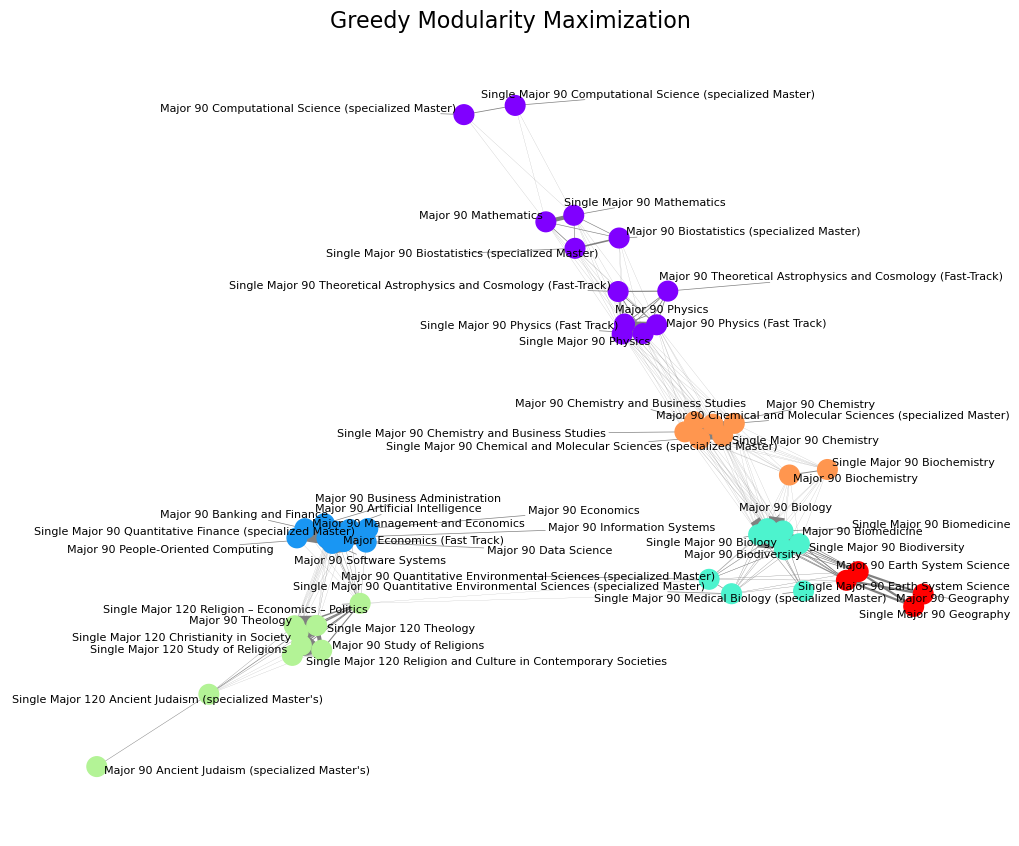

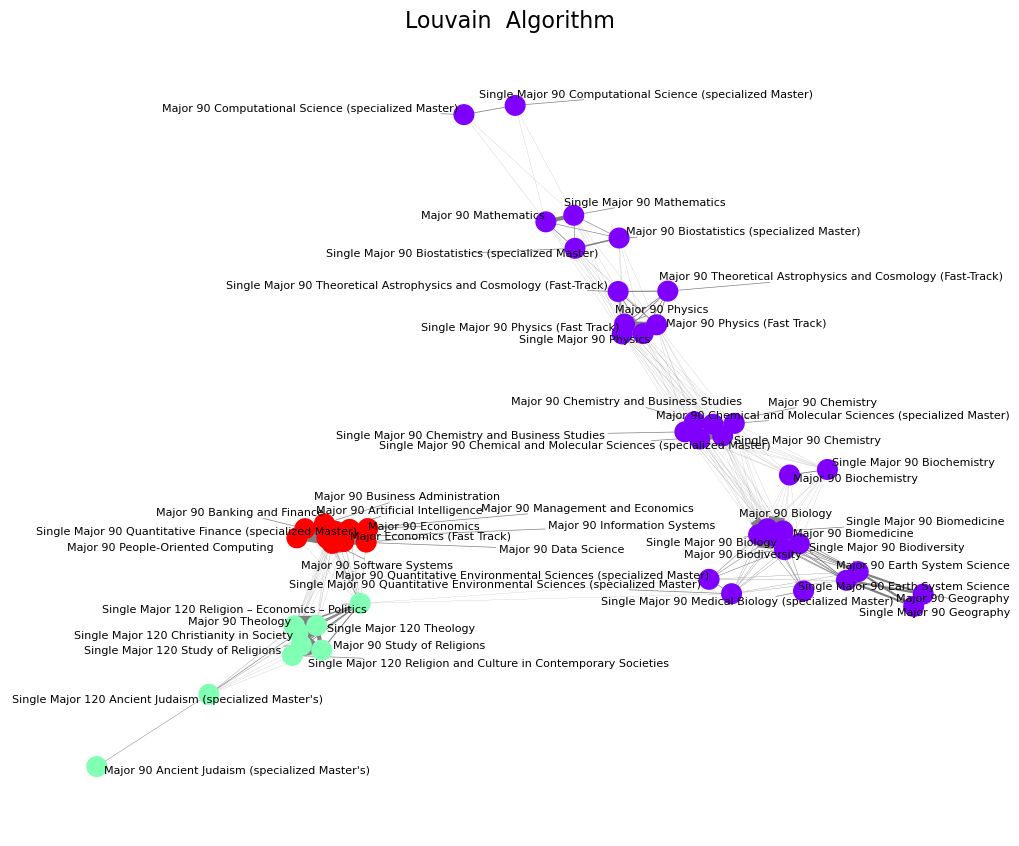

In [ ]:

gc = list(greedy_modularity_communities(G, weight="weight", resolution=1, ))
print(f"Greedy Modularity Communities: number = {len(gc)}, communities: {gc}")

louvain = list(louvain_communities(G, weight="weight", resolution=best_resolution))
print(f"Label Propagation Communities: number = {len(louvain)}, communities: {louvain}")


plot_graph(G, gc, "Greedy Modularity Maximization")

plot_graph(G, louvain, "Louvain  Algorithm")

# Whole process in one go

Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Resolution: 0.01, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Resolution: 0.05, NMI: 0.8424, ARI: 0.8697  , Len Communities: 2.0
Resolution: 0.1, NMI: 0.8424, ARI: 0.8697  , Len Communities: 2.0
Resolution: 0.2, NMI: 0.7064, ARI: 0.6088  , Len Communities: 3.0
Resolution: 0.3, NMI: 0.8488, ARI: 0.7282  , Len Communities: 4.0
Resolution: 0.4, NMI: 0.8488, ARI: 0.7282  , Len Communities: 4.0
Resolution: 0.5, NMI: 0.8488, ARI: 0.7282  , Len Communities: 4.0
Resolution: 0.75, NMI: 0.7542, ARI: 0.5372  , Len Communities: 5.0
Resolution: 1.0, NMI: 0.7292, ARI: 0.4578  , Len Communities: 5.0
Resolution: 1.5, NMI: 0.6784, ARI: 0.3756  , Len Communities: 6.0
Resolution: 2.0, NMI: 0.6008, ARI: 0.2682  , Len Communities: 9.0
Resolution: 2.5, NMI: 0.5630, ARI: 0.2476  , Len Communities: 15.0
Resolution: 3.0, NMI: 0.5357, ARI: 0.2122  , Len Communities: 18.0
NMI:  0.849 - Resolution:  0.300  - greedy_HS24_Bachelors


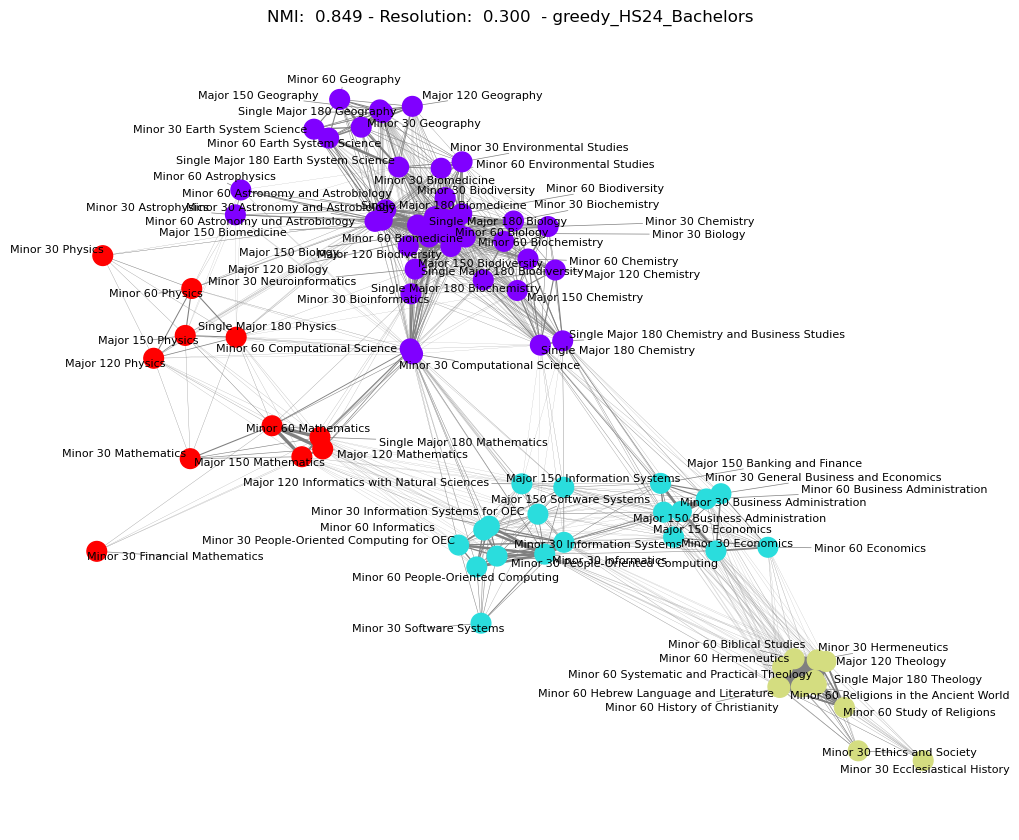

Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Resolution: 0.01, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Resolution: 0.05, NMI: 0.8424, ARI: 0.8697  , Len Communities: 2.0
Resolution: 0.1, NMI: 0.8424, ARI: 0.8697  , Len Communities: 2.0
Resolution: 0.2, NMI: 0.7064, ARI: 0.6088  , Len Communities: 3.0
Resolution: 0.3, NMI: 0.8488, ARI: 0.7282  , Len Communities: 4.0
Resolution: 0.4, NMI: 0.8488, ARI: 0.7282  , Len Communities: 4.0
Resolution: 0.5, NMI: 0.7618, ARI: 0.5630  , Len Communities: 5.0
Resolution: 0.75, NMI: 0.7271, ARI: 0.4503  , Len Communities: 5.0
Resolution: 1.0, NMI: 0.7292, ARI: 0.4578  , Len Communities: 5.0
Resolution: 1.5, NMI: 0.6507, ARI: 0.3433  , Len Communities: 7.0
Resolution: 2.0, NMI: 0.6049, ARI: 0.2784  , Len Communities: 9.0
Resolution: 2.5, NMI: 0.5630, ARI: 0.2476  , Len Communities: 15.0
Resolution: 3.0, NMI: 0.5428, ARI: 0.2213  , Len Communities: 17.0
Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
R

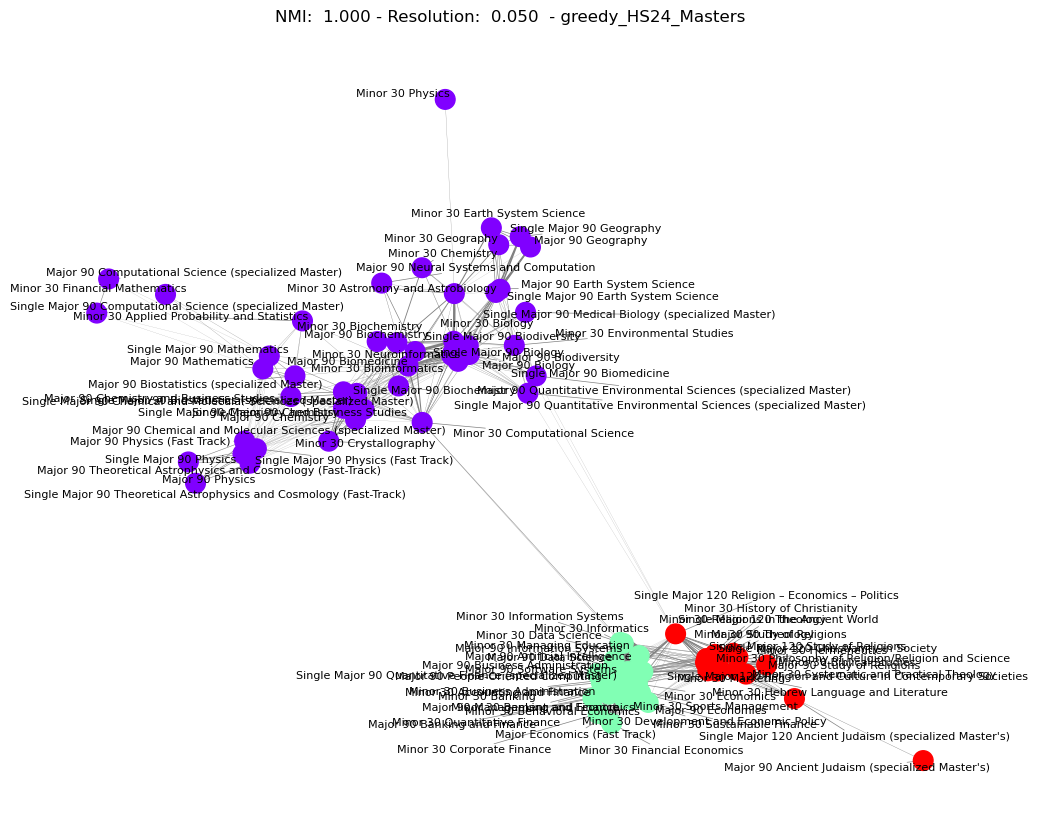

Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Resolution: 0.01, NMI: 0.8120, ARI: 0.7770  , Len Communities: 2.0
Resolution: 0.05, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.1, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.2, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.3, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.4, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.5, NMI: 0.8668, ARI: 0.7512  , Len Communities: 4.0
Resolution: 0.75, NMI: 0.8668, ARI: 0.7512  , Len Communities: 4.0
Resolution: 1.0, NMI: 0.8501, ARI: 0.6958  , Len Communities: 4.0
Resolution: 1.5, NMI: 0.7110, ARI: 0.4817  , Len Communities: 7.0
Resolution: 2.0, NMI: 0.6560, ARI: 0.3752  , Len Communities: 9.0
Resolution: 2.5, NMI: 0.6088, ARI: 0.3393  , Len Communities: 16.0
Resolution: 3.0, NMI: 0.5851, ARI: 0.2975  , Len Communities: 18.0
Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
R

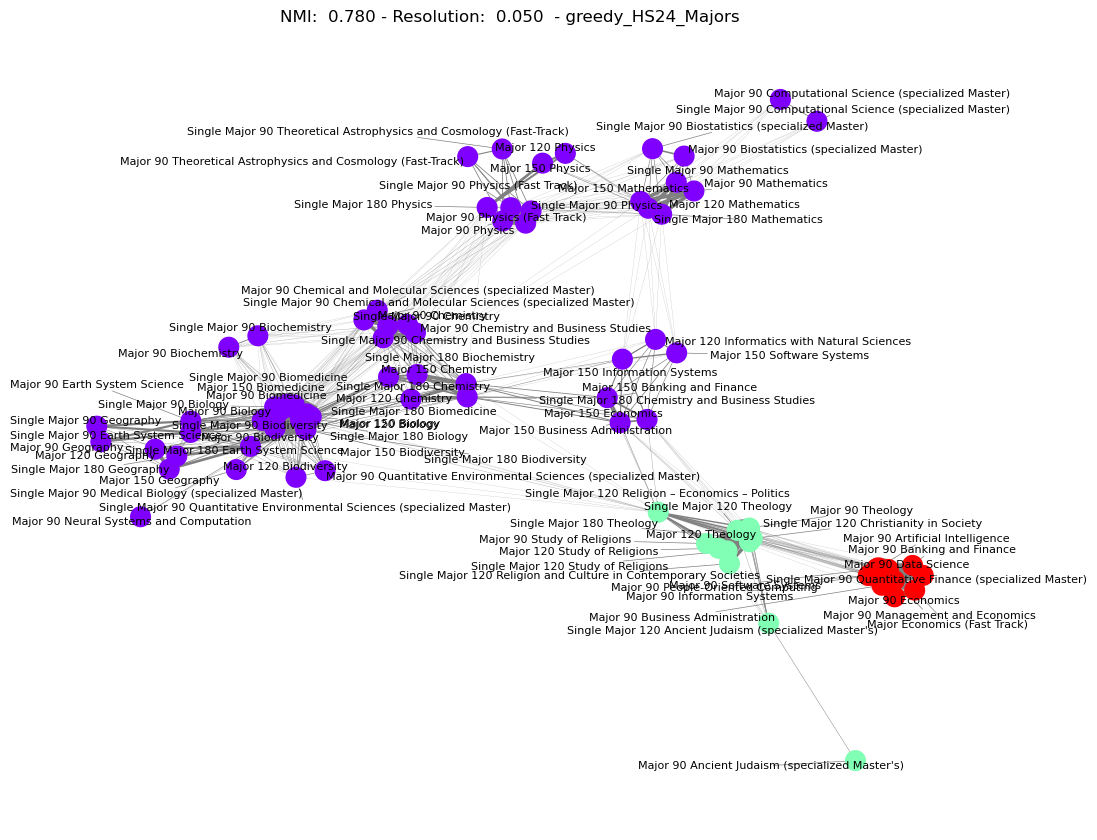

Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Resolution: 0.01, NMI: 0.6246, ARI: 0.7055  , Len Communities: 2.0
Resolution: 0.05, NMI: 0.7804, ARI: 0.7772  , Len Communities: 3.0
Resolution: 0.1, NMI: 0.6394, ARI: 0.4490  , Len Communities: 4.0
Resolution: 0.2, NMI: 0.6377, ARI: 0.4206  , Len Communities: 4.0
Resolution: 0.3, NMI: 0.6377, ARI: 0.4206  , Len Communities: 4.0
Resolution: 0.4, NMI: 0.6377, ARI: 0.4206  , Len Communities: 4.0
Resolution: 0.5, NMI: 0.6377, ARI: 0.4206  , Len Communities: 4.0
Resolution: 0.75, NMI: 0.5584, ARI: 0.2655  , Len Communities: 6.0
Resolution: 1.0, NMI: 0.5584, ARI: 0.2655  , Len Communities: 6.0
Resolution: 1.5, NMI: 0.5584, ARI: 0.2655  , Len Communities: 6.0
Resolution: 2.0, NMI: 0.4929, ARI: 0.1697  , Len Communities: 9.0
Resolution: 2.5, NMI: 0.4748, ARI: 0.1607  , Len Communities: 13.0
Resolution: 3.0, NMI: 0.4643, ARI: 0.1555  , Len Communities: 19.0
Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
R

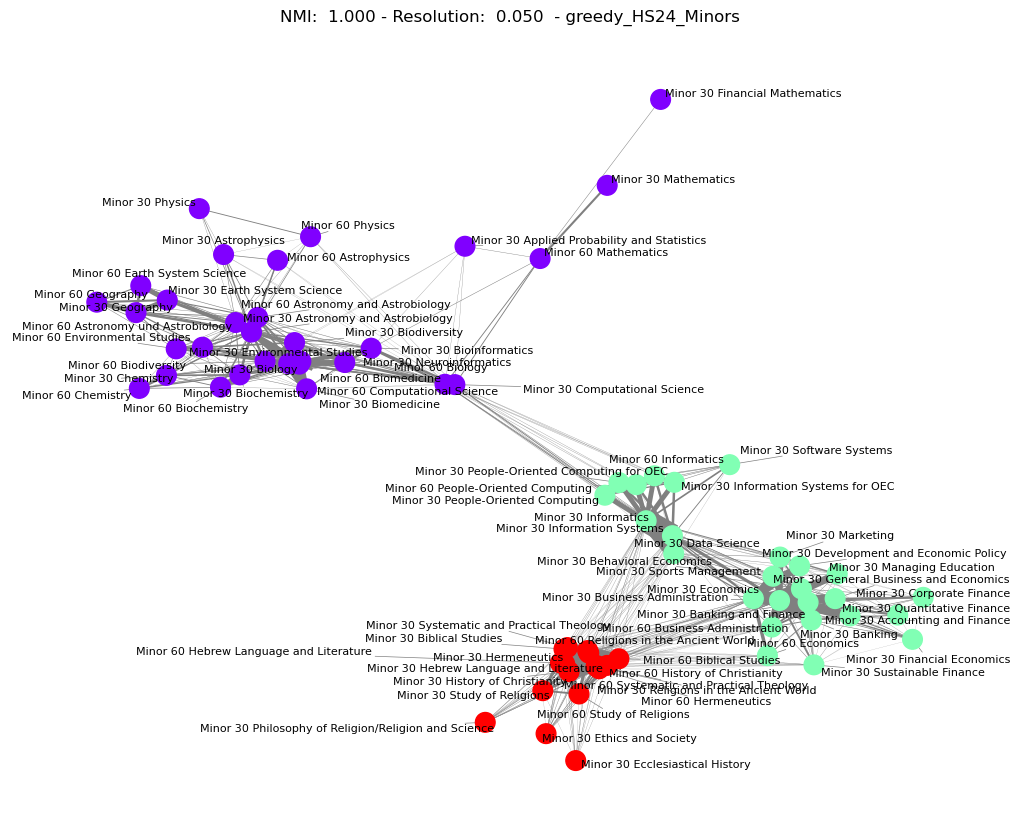

Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Resolution: 0.01, NMI: 0.7771, ARI: 0.6740  , Len Communities: 2.0
Resolution: 0.05, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.1, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.2, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.3, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.4, NMI: 0.9042, ARI: 0.8691  , Len Communities: 4.0
Resolution: 0.5, NMI: 0.9042, ARI: 0.8691  , Len Communities: 4.0
Resolution: 0.75, NMI: 0.9042, ARI: 0.8691  , Len Communities: 4.0
Resolution: 1.0, NMI: 0.9042, ARI: 0.8691  , Len Communities: 4.0
Resolution: 1.5, NMI: 0.9042, ARI: 0.8691  , Len Communities: 4.0
Resolution: 2.0, NMI: 0.7772, ARI: 0.6088  , Len Communities: 6.0
Resolution: 2.5, NMI: 0.7232, ARI: 0.5239  , Len Communities: 8.0
Resolution: 3.0, NMI: 0.6086, ARI: 0.3888  , Len Communities: 21.0
Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Re

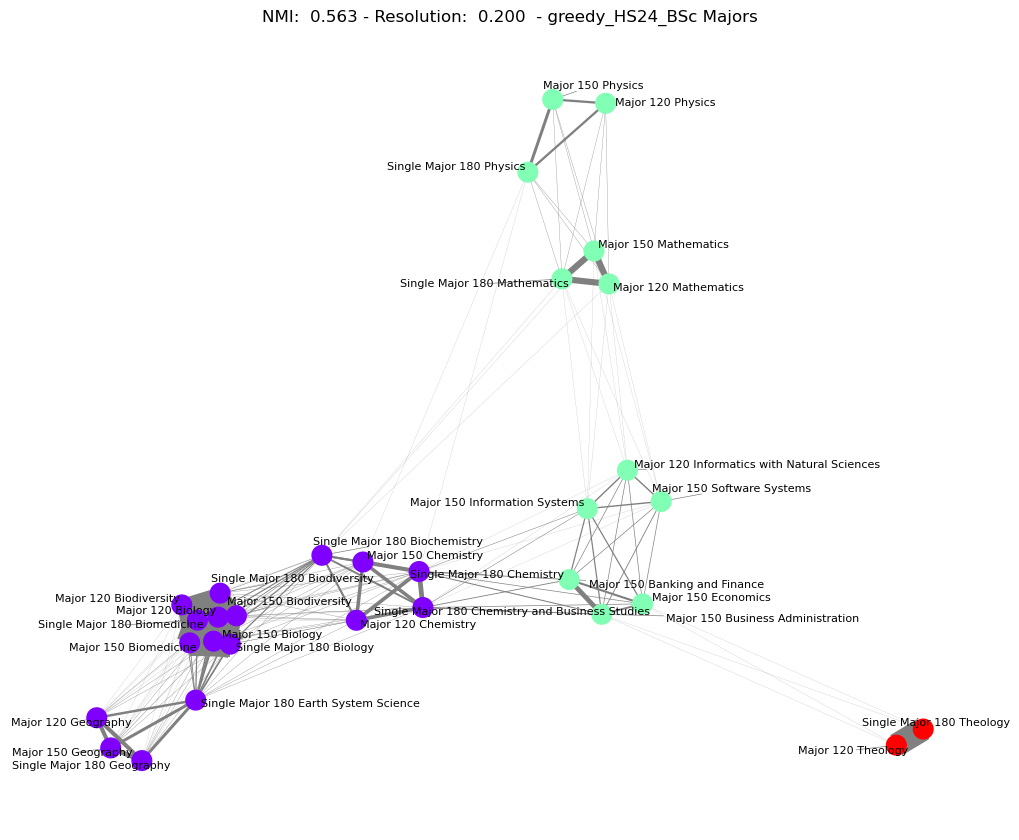

Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Resolution: 0.01, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Resolution: 0.05, NMI: 0.4054, ARI: 0.1004  , Len Communities: 3.0
Resolution: 0.1, NMI: 0.4054, ARI: 0.1004  , Len Communities: 3.0
Resolution: 0.2, NMI: 0.4530, ARI: 0.1650  , Len Communities: 3.0
Resolution: 0.3, NMI: 0.4530, ARI: 0.1650  , Len Communities: 3.0
Resolution: 0.4, NMI: 0.4085, ARI: 0.0717  , Len Communities: 4.0
Resolution: 0.5, NMI: 0.4303, ARI: 0.1129  , Len Communities: 5.0
Resolution: 0.75, NMI: 0.4303, ARI: 0.1129  , Len Communities: 5.0
Resolution: 1.0, NMI: 0.4303, ARI: 0.1129  , Len Communities: 5.0
Resolution: 1.5, NMI: 0.3992, ARI: 0.0623  , Len Communities: 6.0
Resolution: 2.0, NMI: 0.4996, ARI: 0.1614  , Len Communities: 11.0
Resolution: 2.5, NMI: 0.4817, ARI: 0.1514  , Len Communities: 13.0
Resolution: 3.0, NMI: 0.4817, ARI: 0.1514  , Len Communities: 13.0
Resolution: 0.001, NMI: 0.8362, ARI: 0.8569  , Len Communities: 2.0


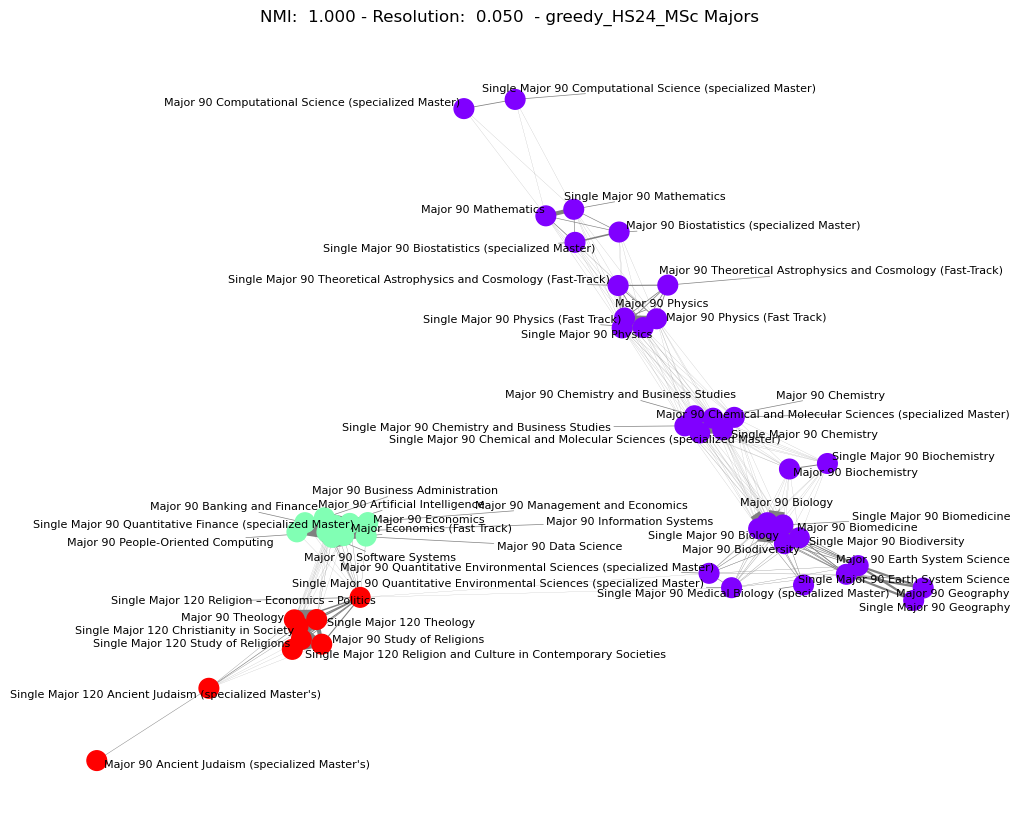

Resolution: 0.001, NMI: 0.8362, ARI: 0.8569  , Len Communities: 2.0
Resolution: 0.01, NMI: 0.8362, ARI: 0.8569  , Len Communities: 2.0
Resolution: 0.05, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.1, NMI: 0.8155, ARI: 0.6033  , Len Communities: 4.0
Resolution: 0.2, NMI: 0.8155, ARI: 0.6033  , Len Communities: 4.0
Resolution: 0.3, NMI: 0.8155, ARI: 0.6033  , Len Communities: 4.0
Resolution: 0.4, NMI: 0.8155, ARI: 0.6033  , Len Communities: 4.0
Resolution: 0.5, NMI: 0.8155, ARI: 0.6033  , Len Communities: 4.0
Resolution: 0.75, NMI: 0.7332, ARI: 0.4487  , Len Communities: 5.0
Resolution: 1.0, NMI: 0.6916, ARI: 0.3895  , Len Communities: 6.0
Resolution: 1.5, NMI: 0.6916, ARI: 0.3895  , Len Communities: 6.0
Resolution: 2.0, NMI: 0.6627, ARI: 0.3496  , Len Communities: 7.0
Resolution: 2.5, NMI: 0.6346, ARI: 0.3145  , Len Communities: 8.0
Resolution: 3.0, NMI: 0.5892, ARI: 0.2910  , Len Communities: 14.0
Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Re

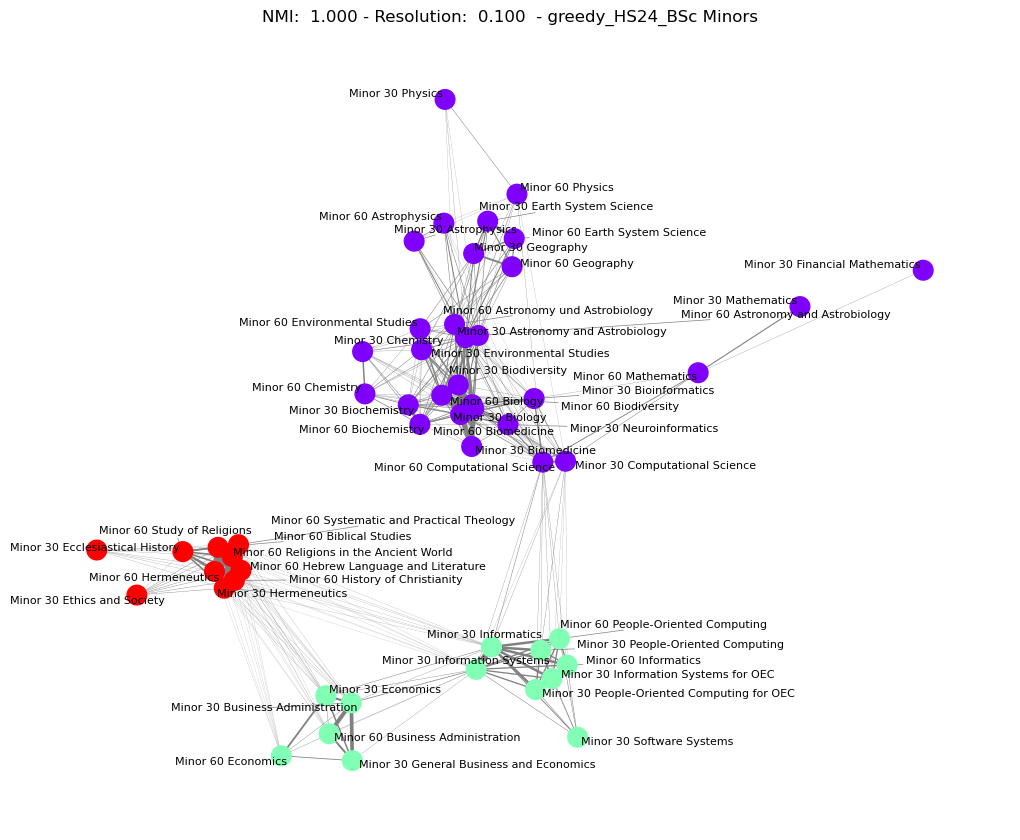

Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Resolution: 0.01, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Resolution: 0.05, NMI: 0.8217, ARI: 0.8113  , Len Communities: 2.0
Resolution: 0.1, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.2, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.3, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.4, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.5, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.75, NMI: 0.9231, ARI: 0.9391  , Len Communities: 4.0
Resolution: 1.0, NMI: 0.6437, ARI: 0.4125  , Len Communities: 5.0
Resolution: 1.5, NMI: 0.7316, ARI: 0.5004  , Len Communities: 6.0
Resolution: 2.0, NMI: 0.6580, ARI: 0.3560  , Len Communities: 8.0
Resolution: 2.5, NMI: 0.6580, ARI: 0.3560  , Len Communities: 8.0
Resolution: 3.0, NMI: 0.6325, ARI: 0.3236  , Len Communities: 10.0
Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Re

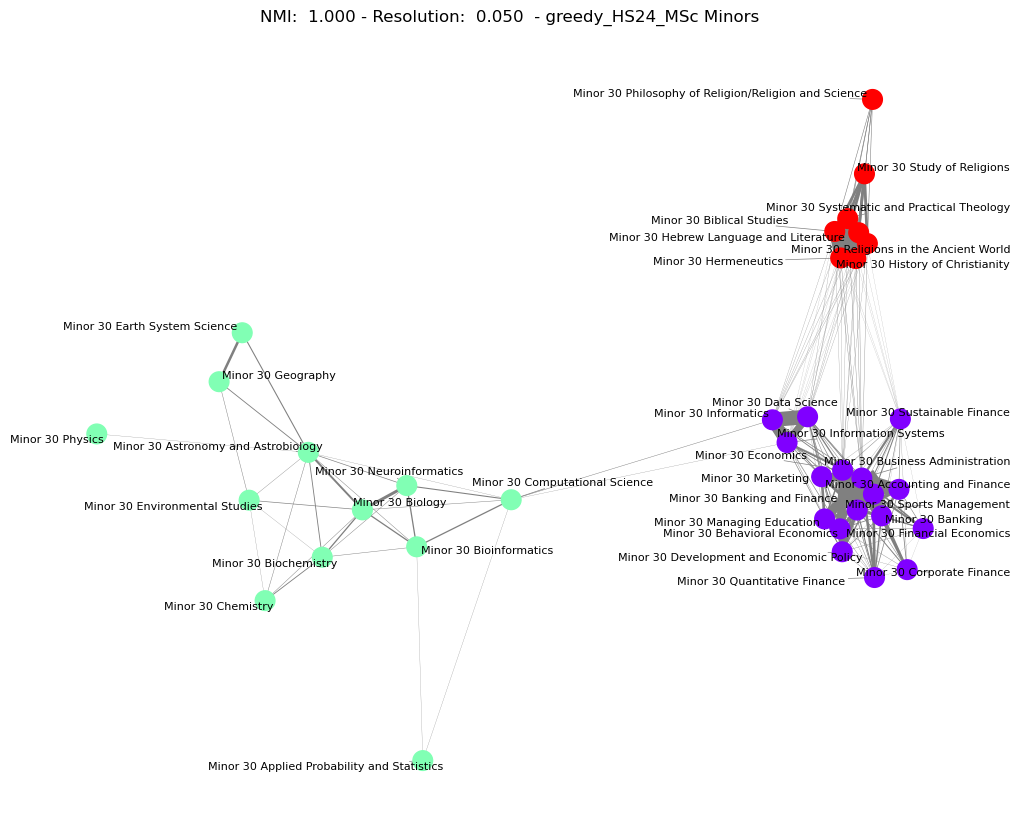

Resolution: 0.001, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Resolution: 0.01, NMI: 0.0000, ARI: 0.0000  , Len Communities: 1.0
Resolution: 0.05, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.1, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.2, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.3, NMI: 1.0000, ARI: 1.0000  , Len Communities: 3.0
Resolution: 0.4, NMI: 0.9078, ARI: 0.8542  , Len Communities: 4.0
Resolution: 0.5, NMI: 0.9078, ARI: 0.8542  , Len Communities: 4.0
Resolution: 0.75, NMI: 0.9078, ARI: 0.8542  , Len Communities: 4.0
Resolution: 1.0, NMI: 0.9078, ARI: 0.8542  , Len Communities: 4.0
Resolution: 1.5, NMI: 0.8369, ARI: 0.7302  , Len Communities: 5.0
Resolution: 2.0, NMI: 0.8369, ARI: 0.7302  , Len Communities: 5.0
Resolution: 2.5, NMI: 0.7623, ARI: 0.6092  , Len Communities: 7.0
Resolution: 3.0, NMI: 0.6508, ARI: 0.4570  , Len Communities: 13.0


In [106]:
import numpy as np
import pandas as pd
import networkx as nx
from networkx.algorithms.community import louvain_communities, greedy_modularity_communities
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


def assign_labels(communities):
    node_to_community = {}
    for i, community in enumerate(communities):
        for node in community:
            node_to_community[node] = i  # Assign community ID as label
    return node_to_community

# Define function to find best resolution for a given graph and algorithm
def find_best_resolution(G, ground_truth_labels, nodes, algorithm, resolutions, community_size=3):
    best_resolution = None
    best_score = -1
    best_ari = -1
    best_nmi = -1
    temp_ari = 0
    temp_nmi = 0
    best_num_communities = None
    nodes = list(G.nodes)  
    
    ground_truth_labels = [node_to_organization.get(node, "Unknown") for node in nodes]
    for resolution in resolutions:
        if algorithm == 'louvain':
            communities = list(louvain_communities(G, weight="weight", resolution=resolution))
        elif algorithm == 'greedy':
            # communities = list(greedy_modularity_communities(G, weight="weight", resolution=resolution, best_n=community_size, cutoff=community_size))
            communities = list(greedy_modularity_communities(G, weight="weight", resolution=resolution))
        else:
            raise ValueError("Unknown algorithm")

        node_to_community = assign_labels(communities)
        detected_labels = [node_to_community.get(node, -1) for node in nodes]

        nmi = normalized_mutual_info_score(ground_truth_labels, detected_labels)
        ari = adjusted_rand_score(ground_truth_labels, detected_labels)
        num_communities = len(communities)
        print(f"Resolution: {resolution}, NMI: {nmi:.4f}, ARI: {ari:.4f}  , Len Communities: {len(communities):.1f}")
        if nmi > best_score:
            best_score = nmi
            best_resolution = resolution
            best_ari = ari
            best_nmi = nmi
            best_num_communities = num_communities
        if len(communities) == community_size:
            temp_nmi = nmi
            temp_ari = ari
            
    
    return best_resolution, best_nmi, best_ari, best_num_communities, temp_nmi, temp_ari




def create_graphs(semester="HS24"):
    study_programs = pd.read_csv(f"data/csv/{semester}/VVZ_{semester}_study_programs.csv", encoding="utf-16")
    module_components = pd.read_csv(f"data/csv/{semester}/VVZ_{semester}_module_components.csv", encoding="utf-16")
    test = study_programs[
        study_programs["Part Of"].str.contains(r"\(RVO ?19\)", case=False, na=False) & 
        study_programs["Program"].str.contains("Major", case=False, na=False)
    ]

    study_programs.loc[test.index, "Organization"] = "Faculty of Arts and Social Sciences"
    # faculties
    combined_df = pd.concat([
        study_programs[study_programs["Organization"] == "Faculty of Science"],
        study_programs[study_programs["Organization"] == "Faculty of Business, Economics and Informatics"],
        study_programs[study_programs["Organization"] == "Faculty of Theology and the Study of Religion"],
        study_programs[study_programs["Organization"] == "Faculty of Theology"],
        # study_programs[study_programs["Organization"] == "Faculty of Arts and Social Sciences"],
    ], axis=0, ignore_index=True) 


    df = combined_df


    bachelors = df[df["Part Of"].str.contains("Bachelor", case=False, na=False)]
    masters = df[df["Part Of"].str.contains("Master", case=False, na=False)]
    majors = df[df["Program"].str.contains("Major", case=False, na=False)]
    minors = df[df["Program"].str.contains("Minor", case=False, na=False)]
    bsc_majors = df[df["Part Of"].str.contains("Bachelor", case=False, na=False) & df["Program"].str.contains("Major", case=False, na=False)]
    msc_majors = df[df["Part Of"].str.contains("Master", case=False, na=False) & df["Program"].str.contains("Major", case=False, na=False)]
    msc_minors= df[df["Part Of"].str.contains("Master", case=False, na=False) & df["Program"].str.contains("Minor", case=False, na=False)]
    bsc_minors = df[df["Part Of"].str.contains("Bachelor", case=False, na=False) & df["Program"].str.contains("Minor", case=False, na=False)]
    
    graphs = {
    "Bachelors": nx.Graph(),
    "Masters": nx.Graph(),
    "Majors": nx.Graph(),
    "Minors": nx.Graph(),
    "BSc Majors": nx.Graph(),
    "MSc Majors": nx.Graph(),
    "BSc Minors": nx.Graph(),
    "MSc Minors": nx.Graph()
    }

    # filtered dataframes for each category
    filtered_dfs = {
        "Bachelors": bachelors,
        "Masters": masters,
        "Majors": majors,
        "Minors": minors,
        "BSc Majors": bsc_majors,
        "MSc Majors": msc_majors,
        "BSc Minors": bsc_minors,
        "MSc Minors": msc_minors
    }
    
    #  graphs based on module components each category
    for category, filtered_df in filtered_dfs.items():
        edges = {}
        for _, row in module_components.iterrows():
            components = row['Components']
            if pd.isna(components):
                continue
            for major in filtered_df['Program']:
                if major in components:
                    for other_major in filtered_df['Program']:
                        if other_major in components and major != other_major:
                            edge_pair = tuple(sorted([major, other_major]))
                            if edge_pair in edges:
                                edges[edge_pair] += 1
                            else:
                                edges[edge_pair] = 1

        G = graphs[category]
        for edge, weight in edges.items():
            G.add_edge(edge[0], edge[1], weight=weight)
    return graphs, filtered_dfs, combined_df
semester = "HS23"
semesters = ["HS23", "FS23", "HS24", "FS24"]
semesters = ["HS24"]

for semester in semesters:
    graphs, filtered_dfs, combined_df = create_graphs(semester)


 
    resolutions = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0]
    # resolutions = [0.001, 0.01, 0.05, 0.1]

  
    results = []


    community_size = 3
    for category, G in graphs.items():
        node_to_organization = dict(zip(combined_df['Program'], combined_df['Organization']))
        nodes = list(G.nodes)
        ground_truth_labels = [node_to_organization.get(node, "Unknown") for node in nodes]

        for algorithm in ['greedy', "louvain"]:
            best_resolution, best_nmi, best_ari, best_num_communities, temp_nmi, temp_ari = find_best_resolution(
                G, ground_truth_labels, nodes, algorithm, resolutions, 4)

       
            results.append({
                "Category": category,
                "Algorithm": algorithm,
                "Best Res": f"{best_resolution:.2f}",
                "Best NMI": f"{best_nmi:.2f}",
                "Best ARI": f"{best_ari:.2f}",
                "Num Com": best_num_communities,
                "optimal 3": best_num_communities == 3,
                "Difference NMI": f"{best_nmi - temp_nmi:.2f}"
            })
            # if algorithm=="louvain":
            #     louvain = list(louvain_communities(G, weight="weight", resolution=best_resolution))
            #     filename = f"{algorithm}_{semester}_{category}"
            #     plot_graph(G, louvain, "louvain", algorithm_name=f"NMI: {best_nmi: .3f} - Resolution: {best_resolution: .3f} ", filename=filename)
            if algorithm=="greedy":
                # greedy = list(greedy_modularity_communities(G, weight="weight", resolution=best_resolution, best_n=community_size, cutoff=community_size))
                greedy = list(greedy_modularity_communities(G, weight="weight", resolution=best_resolution))
                filename = f"{algorithm}_{semester}_{category}"
                plot_graph(G, greedy, "greedy", algorithm_name=f"NMI: {best_nmi: .3f} - Resolution: {best_resolution: .3f} ", filename=filename)

    results_df = pd.DataFrame(results)



    results_df.to_csv(f"community_detection_results{semester}.csv", index=False)


## Play around here

Resolution: 0.001, NMI: 0.0699, ARI: 0.0213  , Len Communities: 4.0
NMI:  0.070 - Resolution:  0.001  - greedy_HS24_MSc Majors


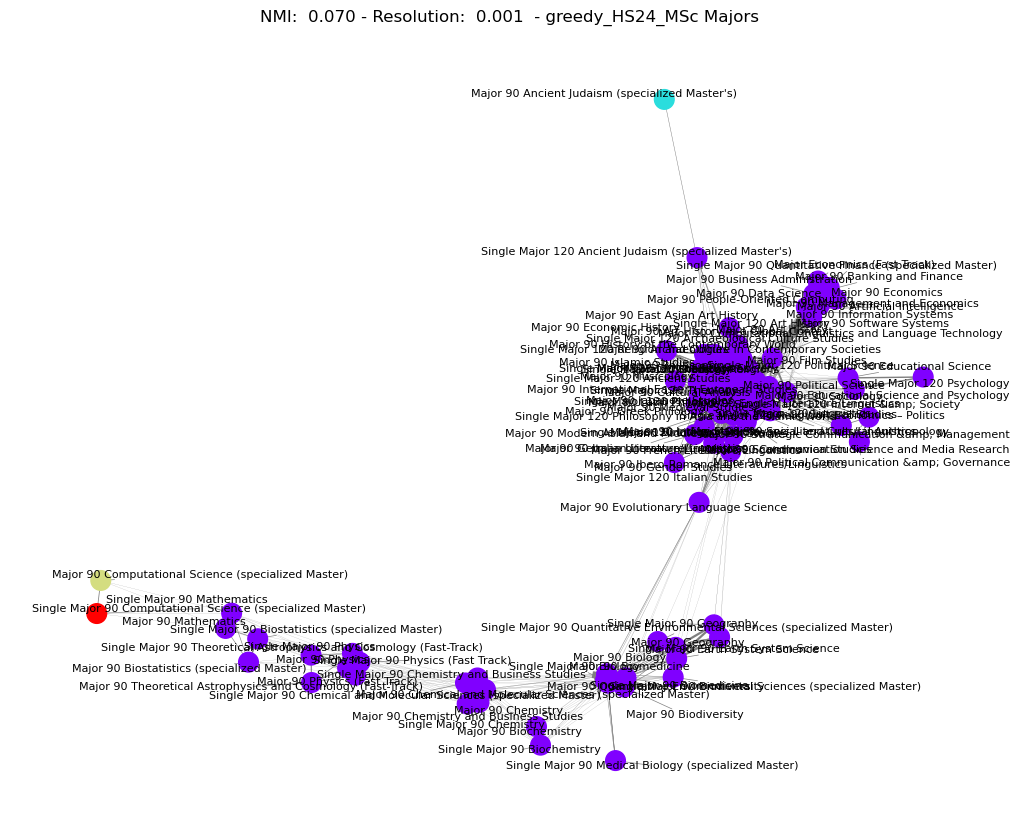

In [55]:
reso = 0.001
greedy = list(greedy_modularity_communities(G, weight="weight", resolution=reso, best_n=community_size, cutoff=community_size))
filename = f"{algorithm}_{semester}_{category}"
node_to_community = assign_labels(greedy)
detected_labels = [node_to_community.get(node, -1) for node in nodes]

nmi = normalized_mutual_info_score(ground_truth_labels, detected_labels)
ari = adjusted_rand_score(ground_truth_labels, detected_labels)
num_communities = len(greedy)
print(f"Resolution: {reso}, NMI: {nmi:.4f}, ARI: {ari:.4f}  , Len Communities: {len(greedy):.1f}")

plot_graph(G, greedy, "greedy", algorithm_name=f"NMI: {nmi: .3f} - Resolution: {reso: .3f} ", filename=filename)